In [9]:
from fenics import *
import matplotlib.pyplot as plt

In [10]:
def qq(u):
    return 1 + u**2

In [11]:
# Create mesh and define function space
mesh = UnitSquareMesh(8, 8)
V = FunctionSpace(mesh, 'Lagrange', 1)

In [13]:
# Define boundary condition
u_D = Expression('x[0] + 2*x[1] + 1', degree =1)
def boundary(x, on_boundary):
    return on_boundary
bc = DirichletBC(V, u_D, boundary)
C = Expression('3/2 + sin(20*pi*x[0])', degree=2)

In [14]:
# Define variational problem
u = Function(V)
v = TestFunction(V)
f = Expression('-10*(x[0] + 2*x[1] + 1)', degree=1)
F = qq(u) * dot(grad(u), grad(v)) * dx - f*v*dx

In [15]:
# Compute solution
solve(F == 0, u, bc)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


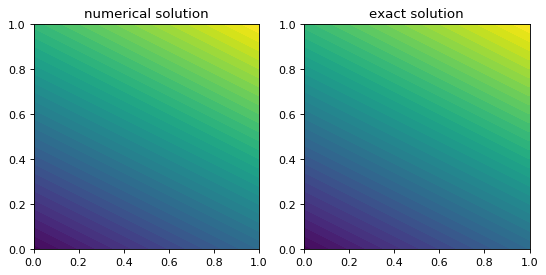

In [7]:
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1,2,1)
plot(u, title='numerical solution')
plt.subplot(1,2,2)
plot(project(u_D, V), title='exact solution')

In [8]:
# Compute maximum error at vertices.
u_e = interpolate(u_D, V)
import numpy as np
error_max = np.abs(u_e.compute_vertex_values() 
                   - u.compute_vertex_values()).max()
print('error_max = ', error_max)

error_max =  0.0
